In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-56.82133818334359 -176.00058747266405
25.787032749888226 133.810614817106
4.053246309562184 42.72325464481395
-22.870956129740563 75.31451375256194
-58.14181290862851 97.82834260297886
43.51460248377583 -114.32423494761636
83.36513793425632 -110.1934344546062
37.62975945403106 -61.34194492170862
-64.31453142254199 -179.80367331560805
74.02962985722729 -53.525730611542556
25.59414179074038 -113.521947139397
-50.042318872348766 -157.9250217947639
-26.024060617330782 -135.2020561966551
-8.829708663341037 71.45086293660663
-65.22168420906394 -97.15449421959859
-17.155729999368205 80.21229819849782
-28.81915643461813 -169.29141736894292
-31.077310823537125 -157.12655048203152
-45.89334861379655 88.14619753966099
54.58860206726382 19.482320038621737
-3.328528240678523 27.810521828777098
24.410525656716032 145.89716006457502
43.44001353484373 -128.7217889443894
1.733758032433201 57.002066750834985
-4.469460425972244 -80.97520729564424
69.99917849597665 101.85766222725135
-49.18772010050468 -

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(20)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(20)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7271fd831c0deb941e8da4b0cef83851
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | naze
Processing Record 3 of Set 13 | wajid
Processing Record 4 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 13 | busselton
Processing Record 6 of Set 13 | hailey
Processing Record 7 of Set 13 | yellowknife
Processing Record 8 of Set 13 | saint george
Processing Record 9 of Set 13 | upernavik
Processing Record 10 of Set 13 | constitucion
Processing Record 11 of Set 13 | mataura
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | hithadhoo
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | avarua
Processing Record 16 of Set 13 | braniewo
Processing Record 17 of Set 13 | kampene
Processing Record 18 of Set 13 | katsuura
Processing Record 19 of Set 13 | north bend
Proce

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,94,20,6.91,TO,2022-06-29 17:11:08
1,Naze,28.3667,129.4833,77.90,85,45,12.39,JP,2022-06-29 17:11:09
2,Wajid,3.8093,43.2471,78.87,51,91,20.22,SO,2022-06-29 17:11:10
3,Busselton,-33.6500,115.3333,48.74,82,0,9.19,AU,2022-06-29 17:11:10
4,Hailey,43.5196,-114.3153,76.80,22,0,5.75,US,2022-06-29 17:11:11
5,Yellowknife,62.4560,-114.3525,51.57,57,22,5.86,CA,2022-06-29 17:07:55
6,Saint George,37.1041,-113.5841,100.26,22,0,5.75,US,2022-06-29 17:11:12
7,Upernavik,72.7868,-56.1549,34.59,92,100,9.84,GL,2022-06-29 17:11:10
8,Constitucion,-35.3333,-72.4167,55.06,98,100,9.91,CL,2022-06-29 17:11:13
9,Mataura,-46.1927,168.8643,42.48,95,85,4.27,NZ,2022-06-29 17:11:13


In [12]:
 # city_weather = requests.get(city_url).json()
 #        # Parse out the needed data.
 #        city_lat = city_weather["coord"]["lat"]
 #        city_lng = city_weather["coord"]["lon"]
 #        city_max_temp = city_weather["main"]["temp_max"]
 #        city_humidity = city_weather["main"]["humidity"]
 #        city_clouds = city_weather["clouds"]["all"]
 #        city_wind = city_weather["wind"]["speed"]
 #        city_country = city_weather["sys"]["country"]
 #        # Convert the date to ISO standard.
 #        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
 #        # Append the city information into city_data list.
 #        city_data.append({"City": city.title(),
 #                          "Lat": city_lat,
 #                          "Lng": city_lng,
 #                          "Max Temp": city_max_temp,
 #                          "Humidity": city_humidity,
 #                          "Cloudiness": city_clouds,
 #                          "Wind Speed": city_wind,
 #                          "Country": city_country,
 #                          "Date": city_date})

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-06-29 17:11:08,-21.2000,-175.2000,75.36,94,20,6.91
1,Naze,JP,2022-06-29 17:11:09,28.3667,129.4833,77.90,85,45,12.39
2,Wajid,SO,2022-06-29 17:11:10,3.8093,43.2471,78.87,51,91,20.22
3,Busselton,AU,2022-06-29 17:11:10,-33.6500,115.3333,48.74,82,0,9.19
4,Hailey,US,2022-06-29 17:11:11,43.5196,-114.3153,76.80,22,0,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

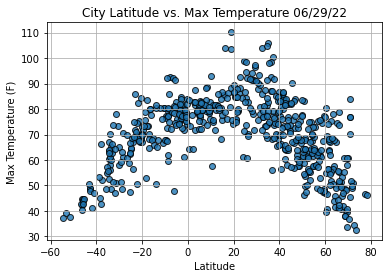

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

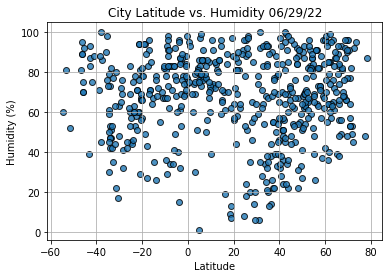

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

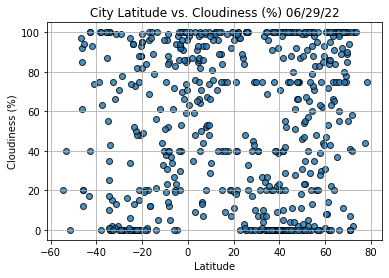

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

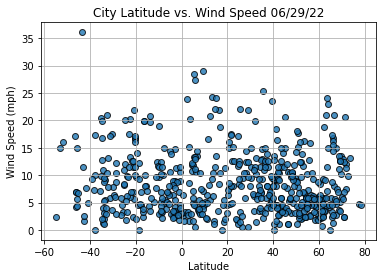

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()